In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## Reading Data and High Level Stat
1. Total number of features - 15
2. Timestamp is converted to datetime object
3. No null values
4. Set timestamp as index

In [2]:
data = pd.read_csv('data.csv')
data.head(5)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [9]:
data = data.drop(['Unnamed: 0'], axis=1)
print(f"List of features - {list(data.columns)}")

List of features - ['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']


In [10]:
# Shape of dataset
data.shape

(1516948, 16)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   timestamp        1516948 non-null  datetime64[ns]
 1   TP2              1516948 non-null  float64       
 2   TP3              1516948 non-null  float64       
 3   H1               1516948 non-null  float64       
 4   DV_pressure      1516948 non-null  float64       
 5   Reservoirs       1516948 non-null  float64       
 6   Oil_temperature  1516948 non-null  float64       
 7   Motor_current    1516948 non-null  float64       
 8   COMP             1516948 non-null  float64       
 9   DV_eletric       1516948 non-null  float64       
 10  Towers           1516948 non-null  float64       
 11  MPG              1516948 non-null  float64       
 12  LPS              1516948 non-null  float64       
 13  Pressure_switch  1516948 non-null  float64       
 14  Oi

In [12]:
# Convert timestamp to Datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1516948 entries, 0 to 1516947
Series name: timestamp
Non-Null Count    Dtype         
--------------    -----         
1516948 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.6 MB


In [13]:
# Counting Null values
data.isna().sum()

timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

In [14]:
# Select timestamp as index
data = data.set_index(['timestamp'])
data.head(4)

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
timestamp,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [15]:
# Numbers of unique values in features
numerical_features = []
categorical_features = []
for column in data.columns:
    if len(data[column].unique()) < 5:
        categorical_features.append(column)
    else:
        numerical_features.append(column)

print("Numerical Features:")
print(numerical_features)
print('\n\nCategorical Features')
print(categorical_features)

Numerical Features:
['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current']


Categorical Features
['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']


## Visualising The Data - 6 Hour Time Windows

In [5]:
def plot_data(data, start, end):
    plot_data = data[start: end]
    for column in plot_data.columns:
        plt.figure(figsize=(20,5))
        sns.lineplot(data=plot_data, x=plot_data.index, y=plot_data[column])
        plt.title(f"Trend of Feature {column}")
        plt.xlabel("Datetime")
        plt.show()

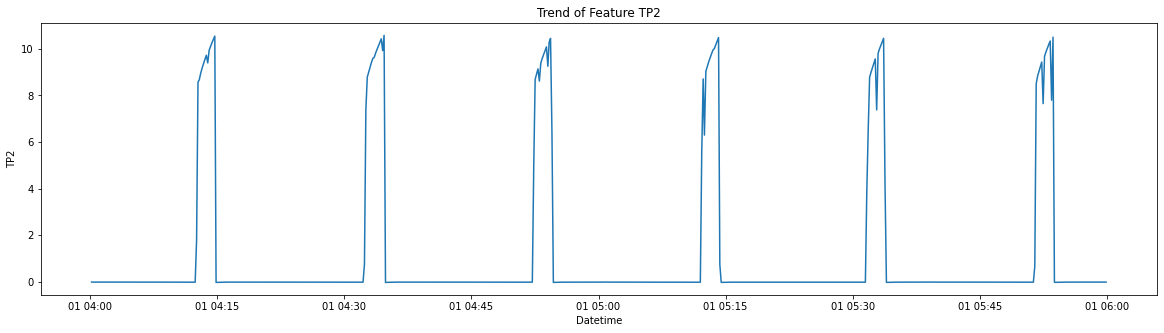

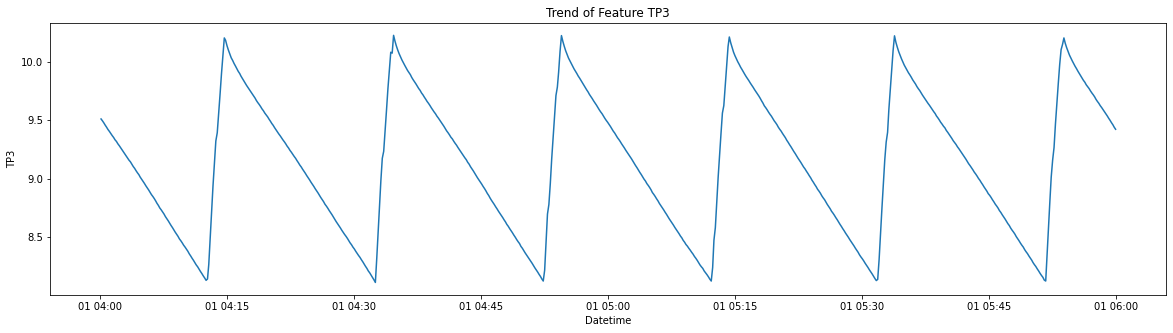

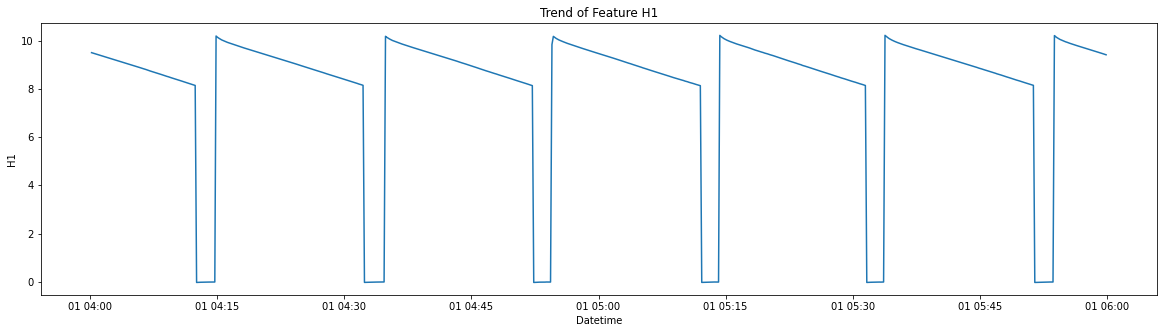

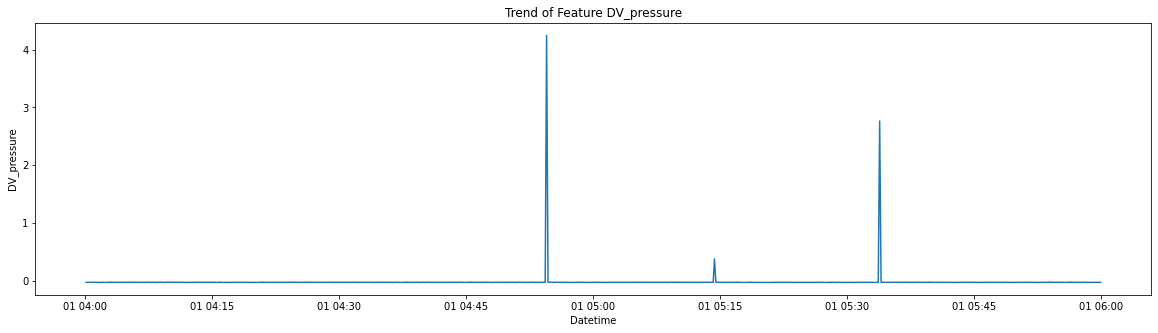

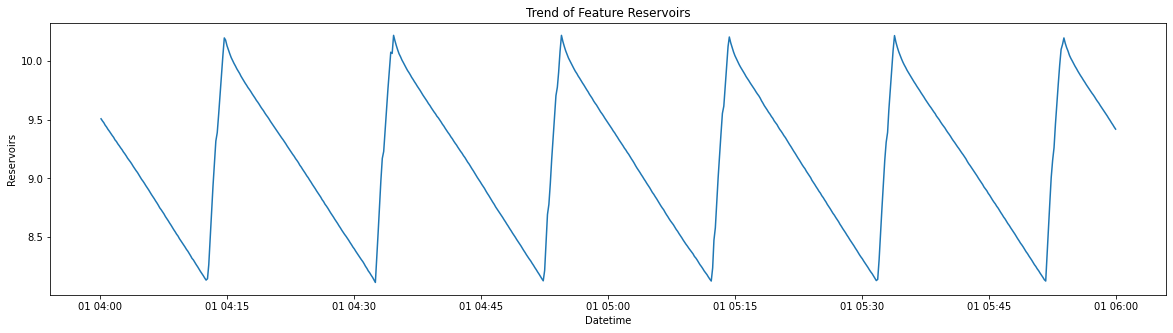

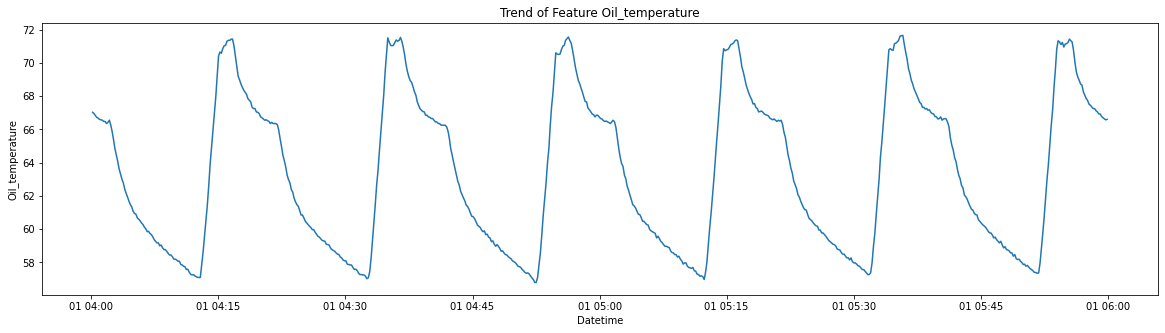

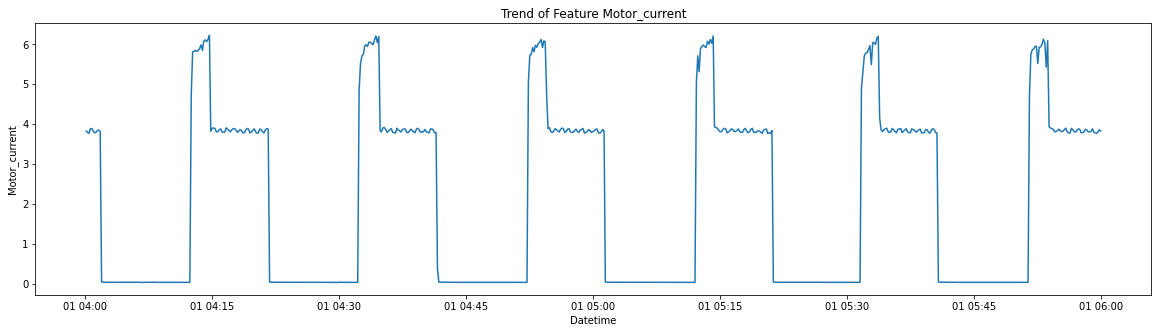

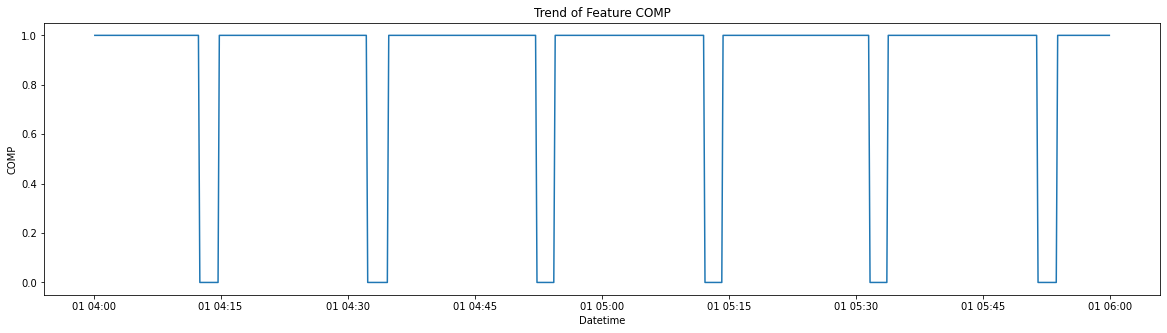

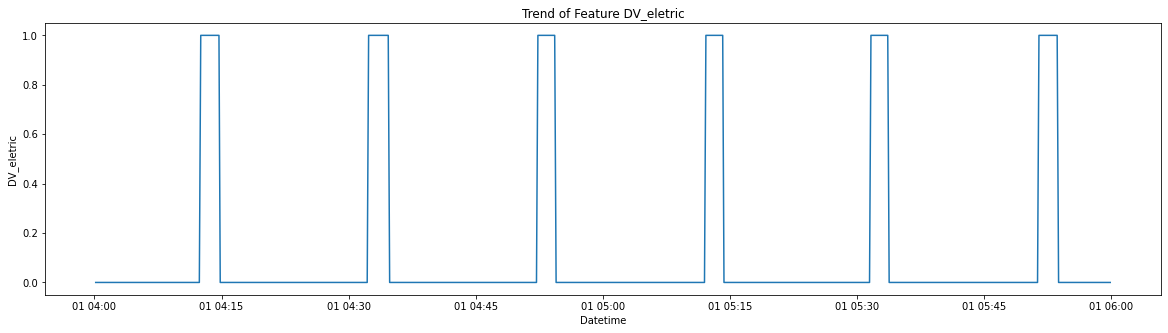

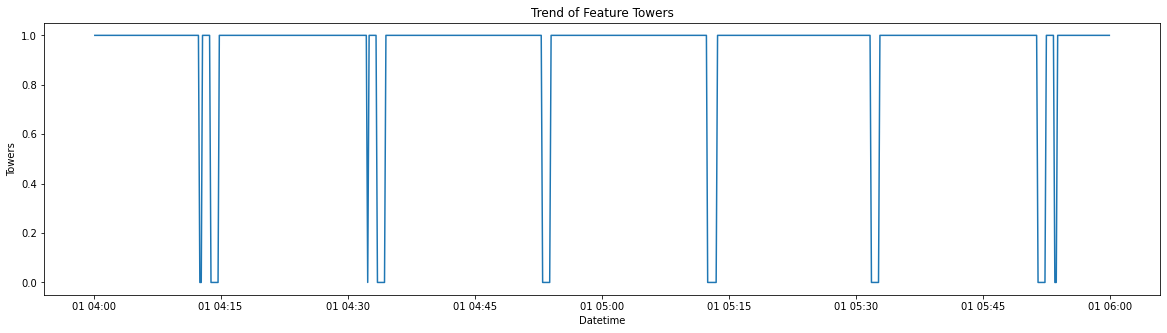

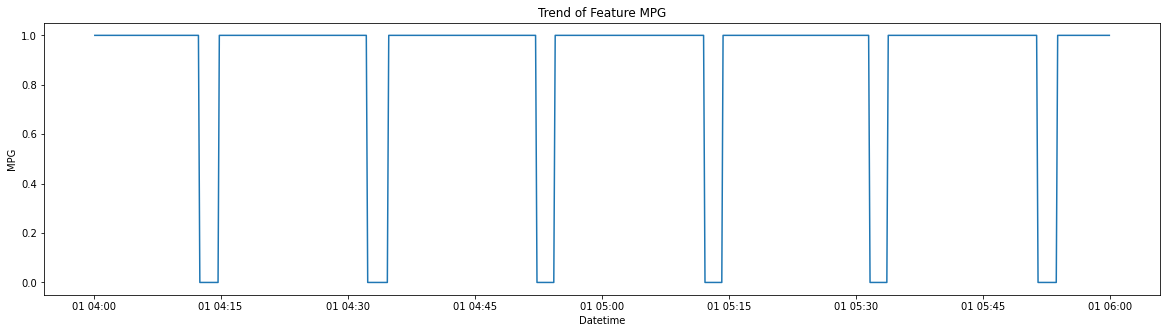

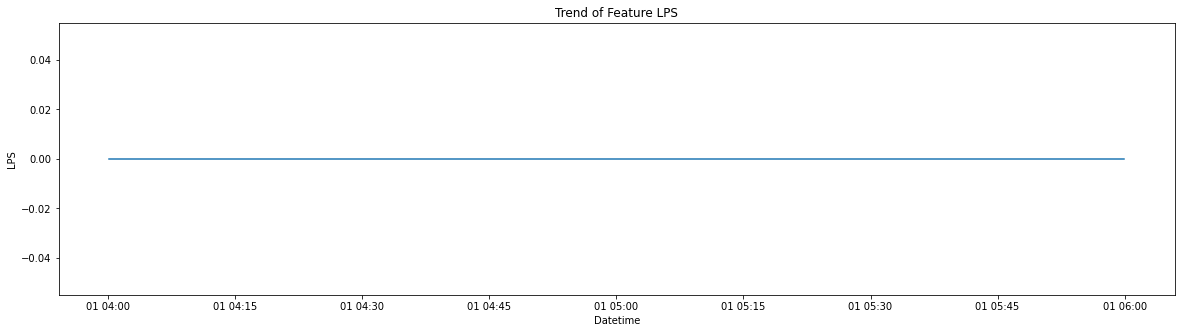

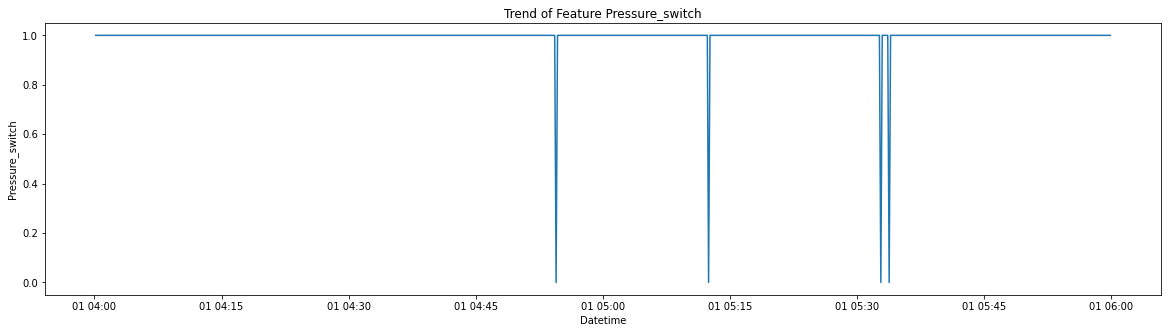

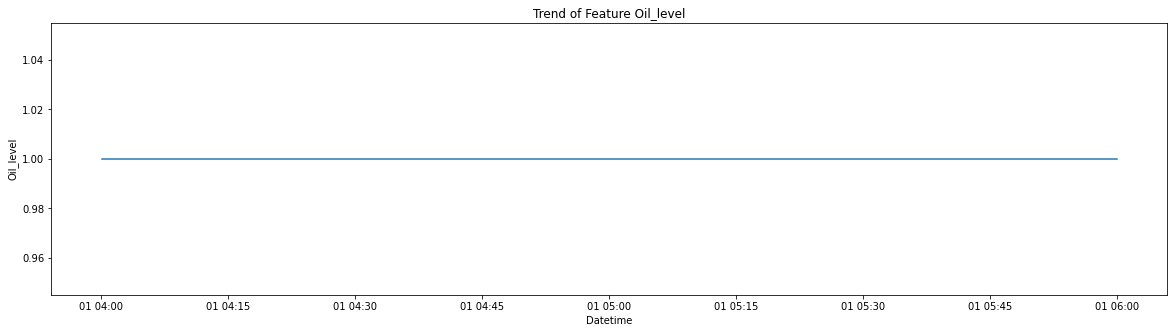

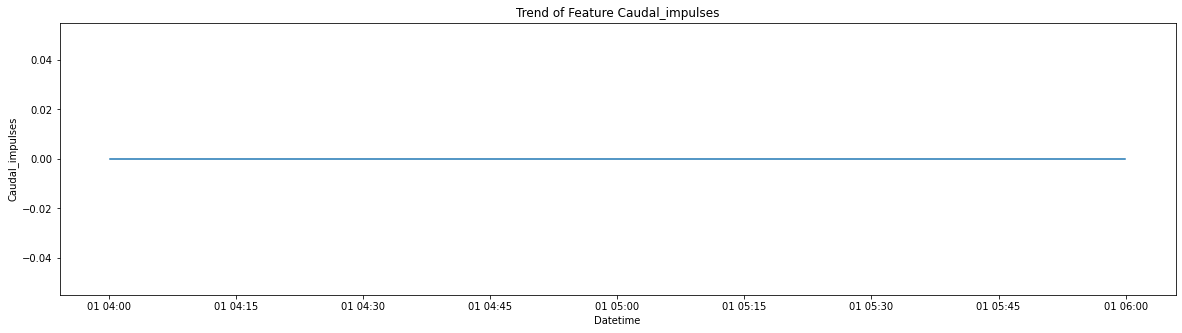

In [15]:
plot_data(data, start=datetime(2020,3,1,0,0), end=datetime(2020,3,1,6,0))

## Visualise During Fault - 29.05.2020 22:00 to 30.05.2020 07:00 (fault duration is from 23:30 to 06:00)
**1. The Trends at fault time are different from normal, specially in features TP2, TP3, H1, DV_Prssure, Reservoirs, Oil_Temperature, Motor_Current, DV Electric, Towers, MPG**

**2. After failure the compressor is not stopped immediately. So it is possible that the failure remains undetected and causes breakdown after some time**

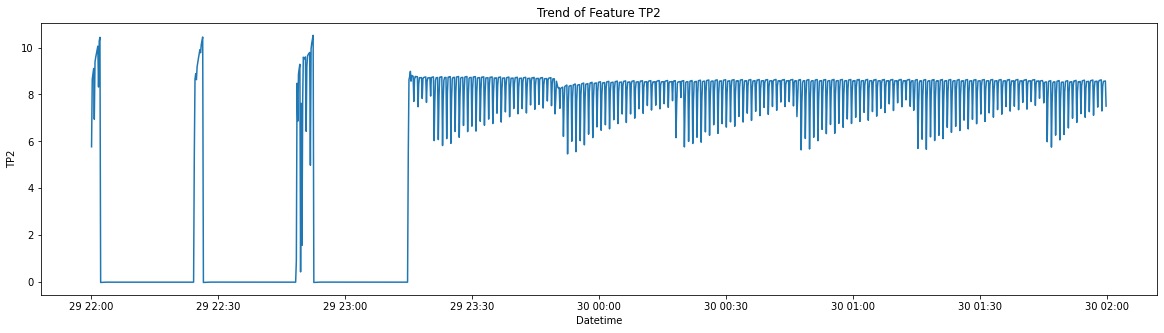

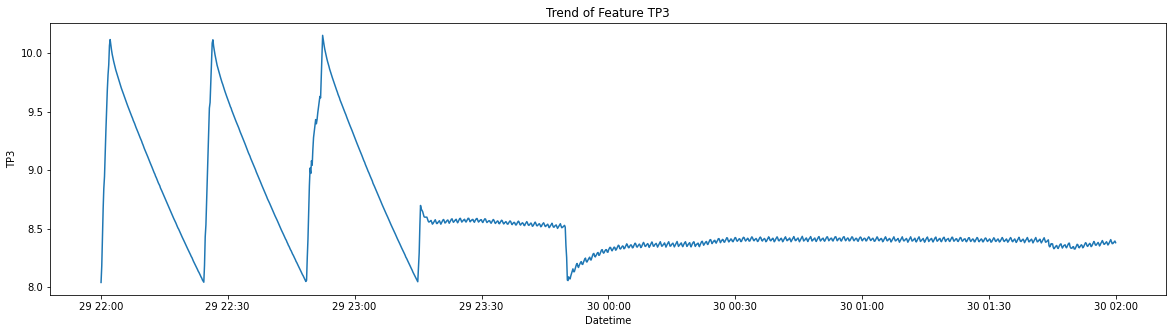

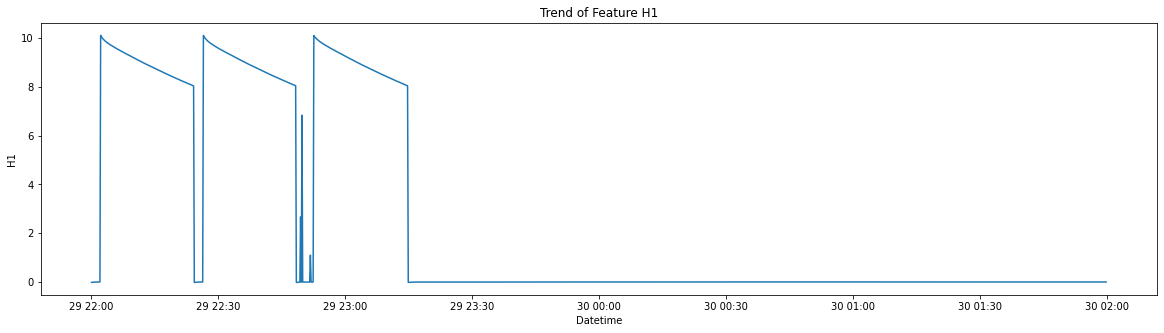

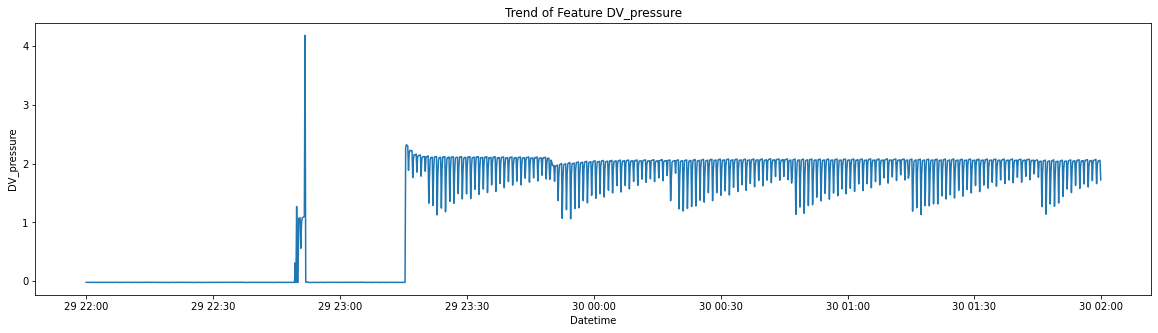

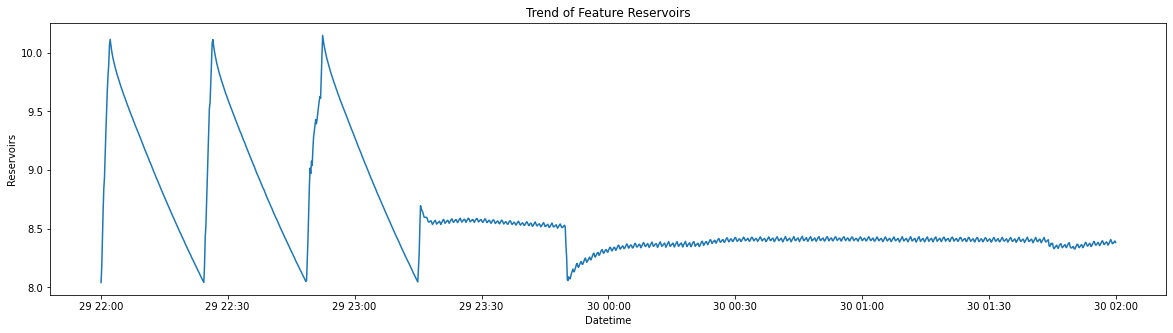

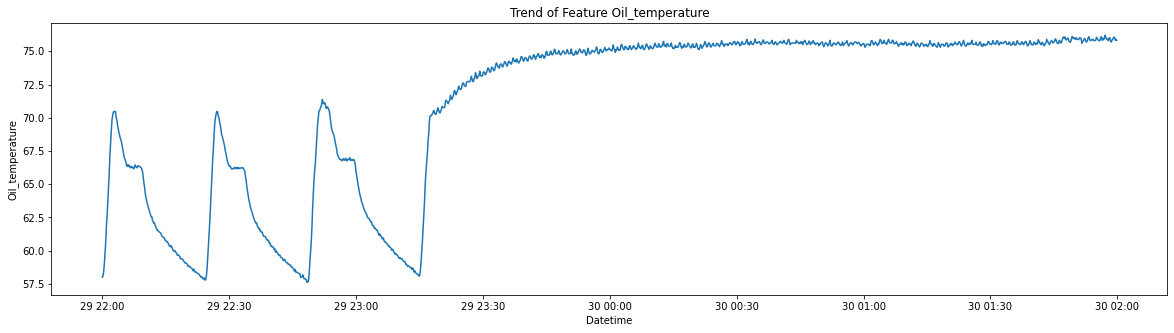

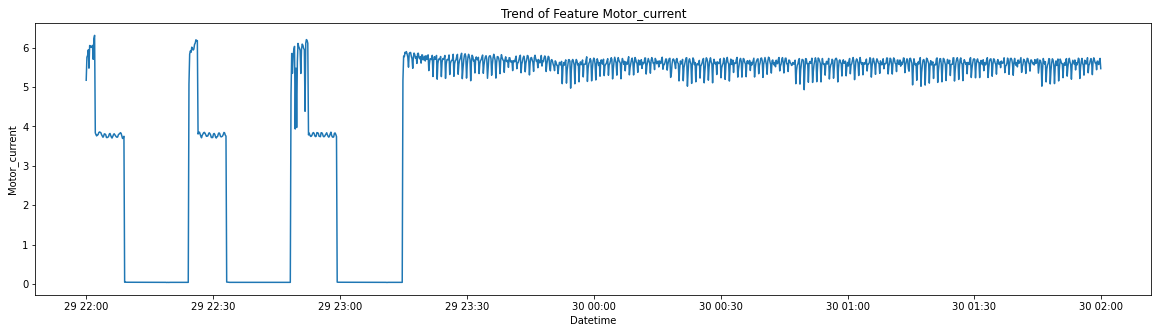

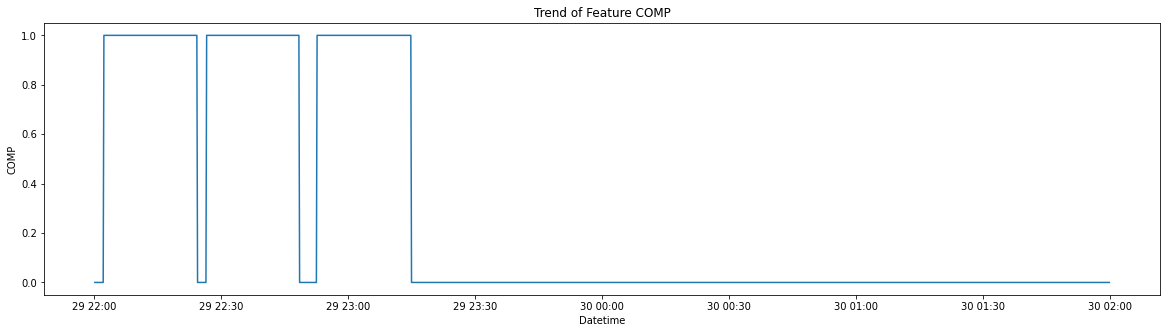

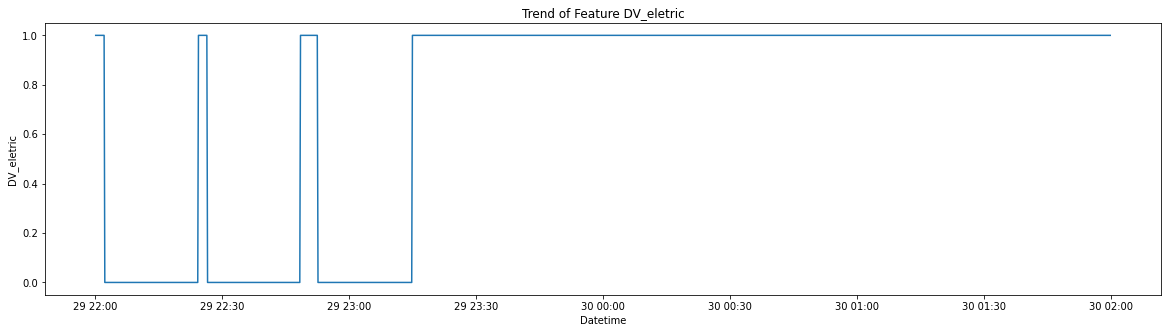

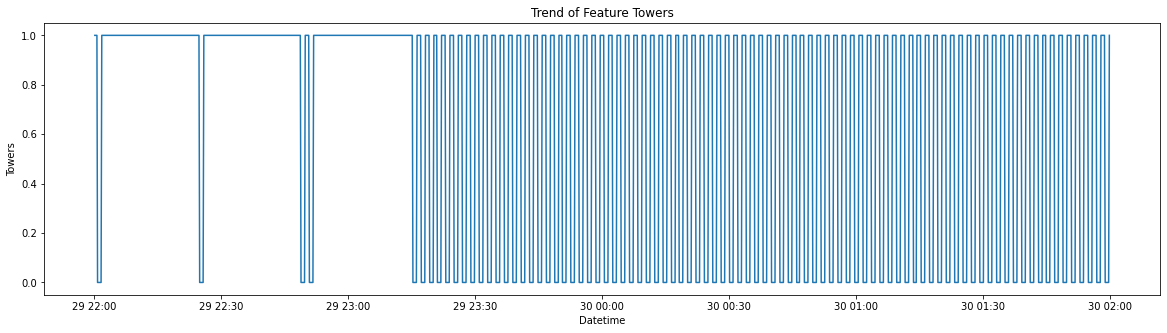

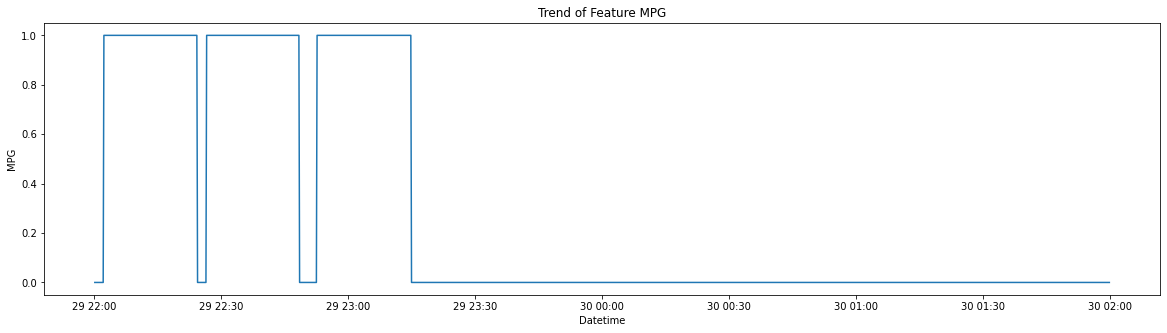

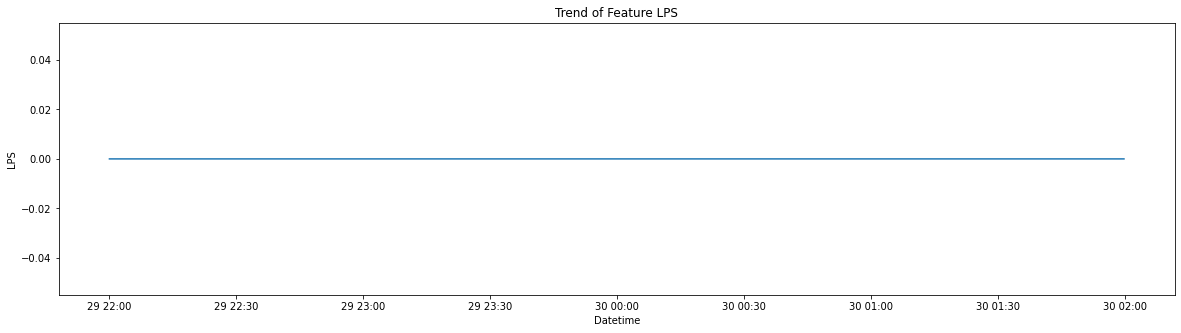

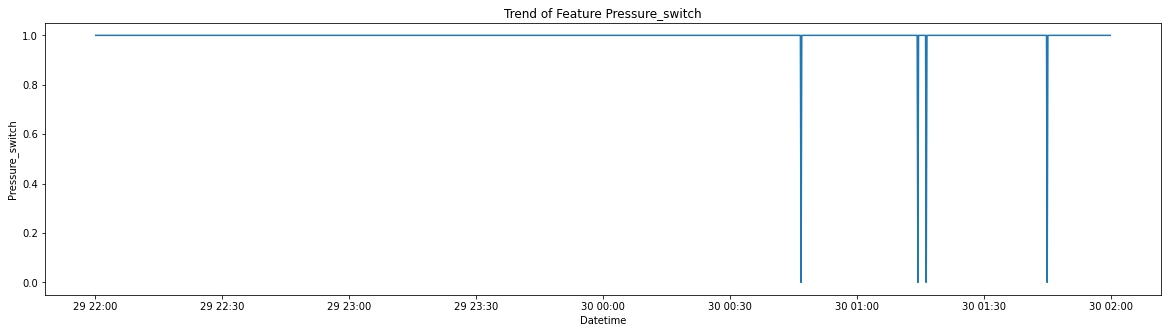

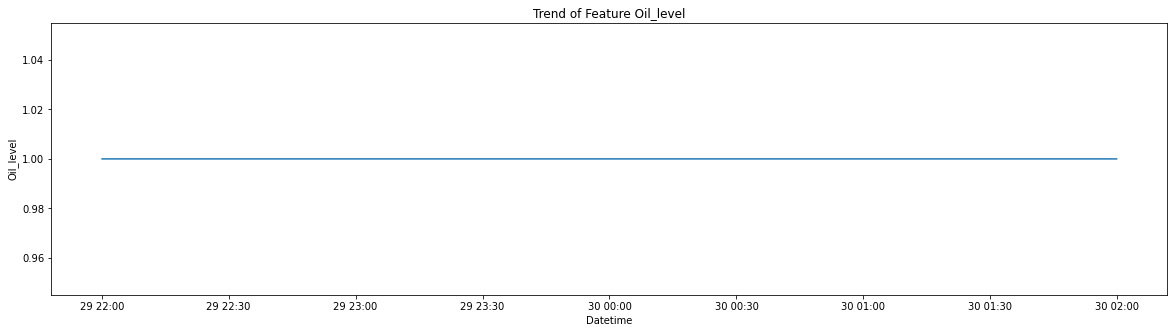

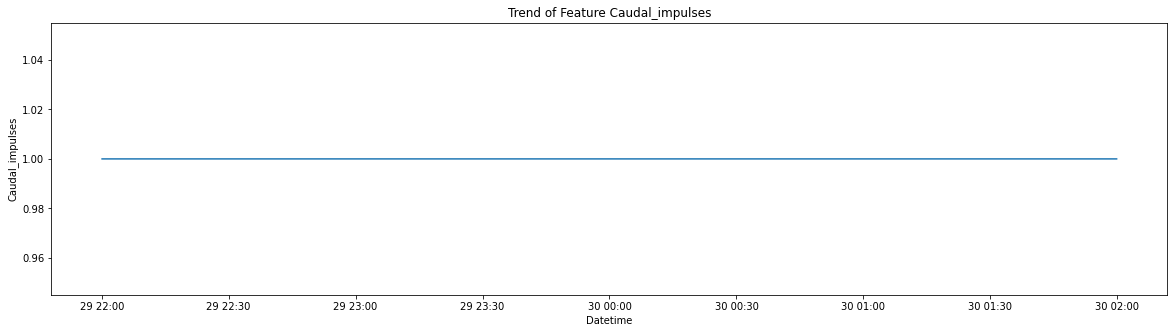

In [16]:
plot_data(data, start=datetime(2020,5,29,22,0), end=datetime(2020,5,30,2,0))

### Visualise During Another Fault Window - 5th June 10:00 to 7th June 14:30 
**First we will visualise 5th June 00 to 5th June 12:00**

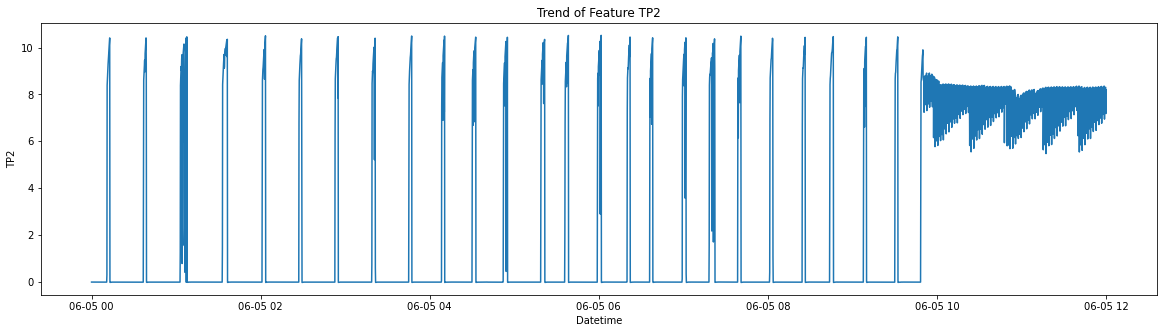

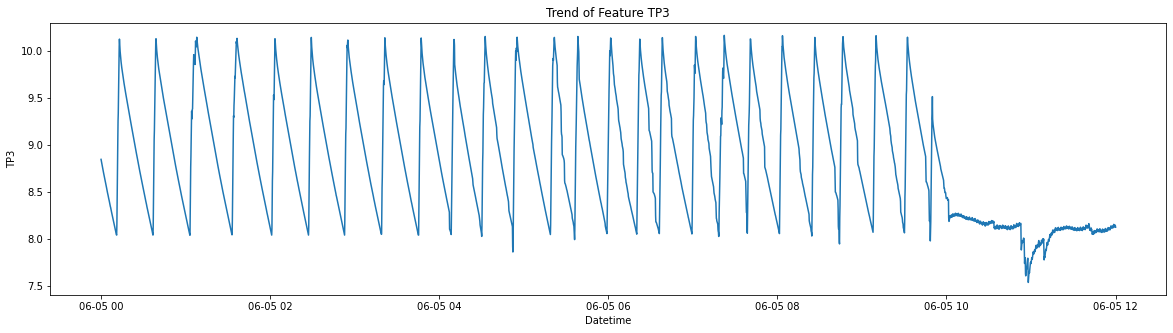

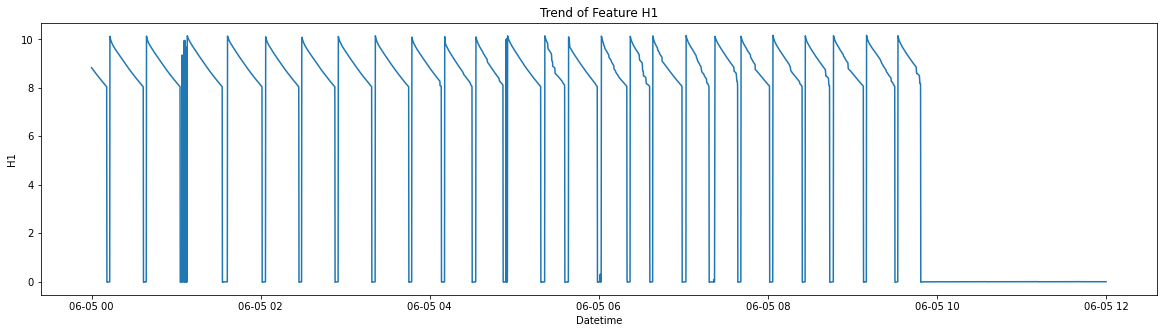

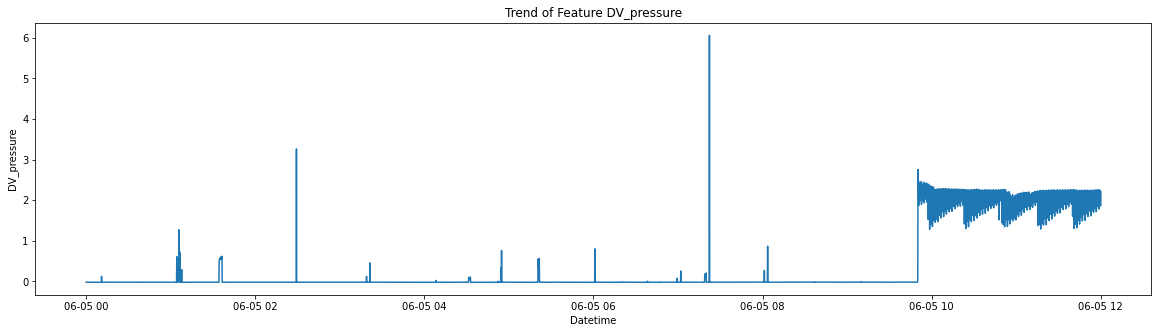

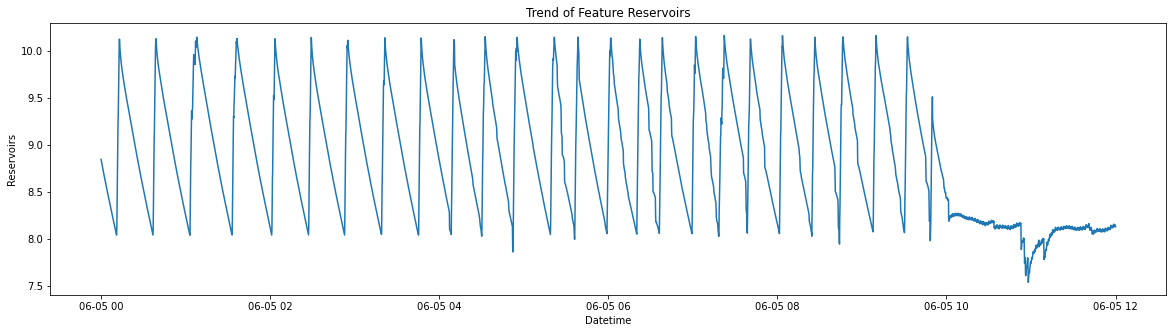

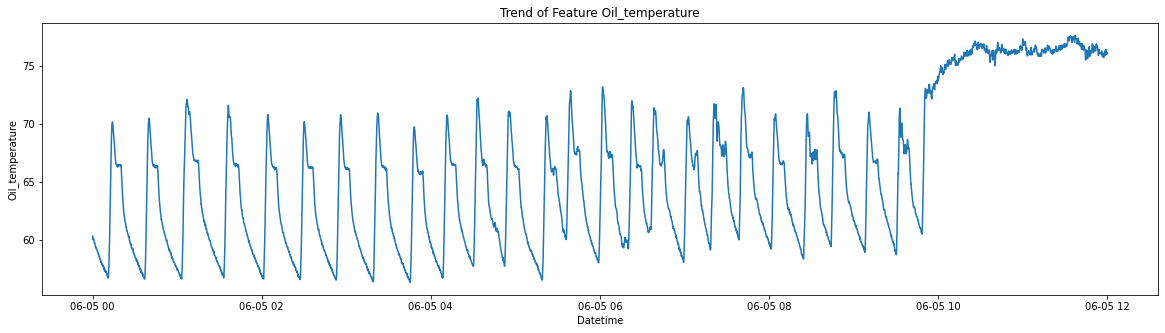

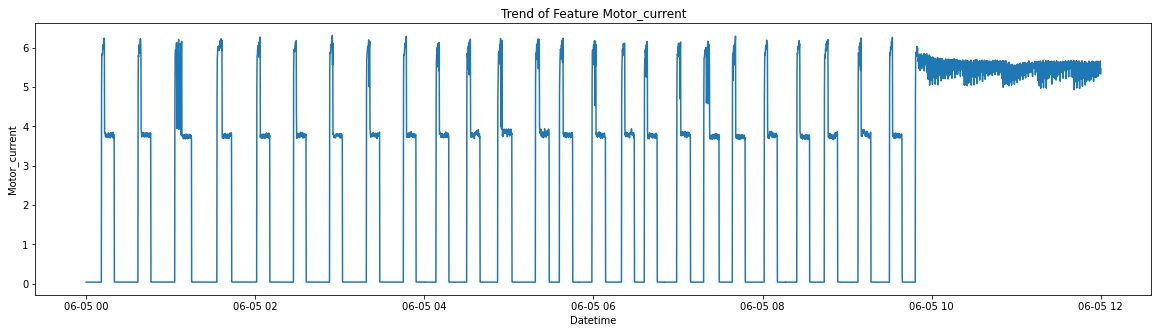

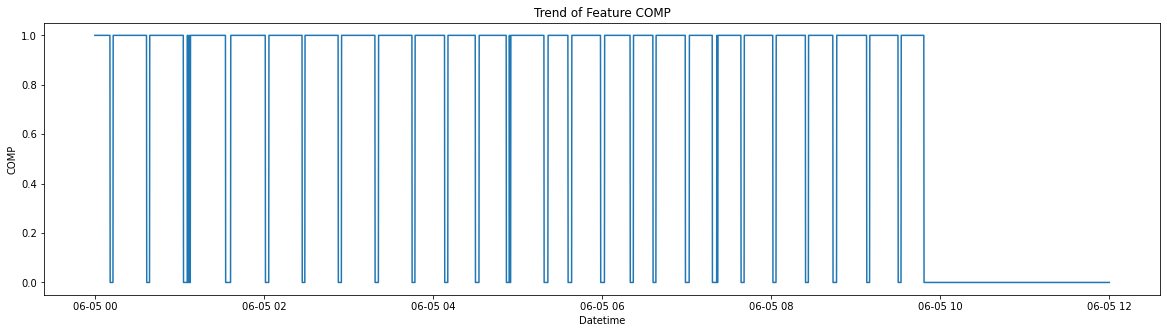

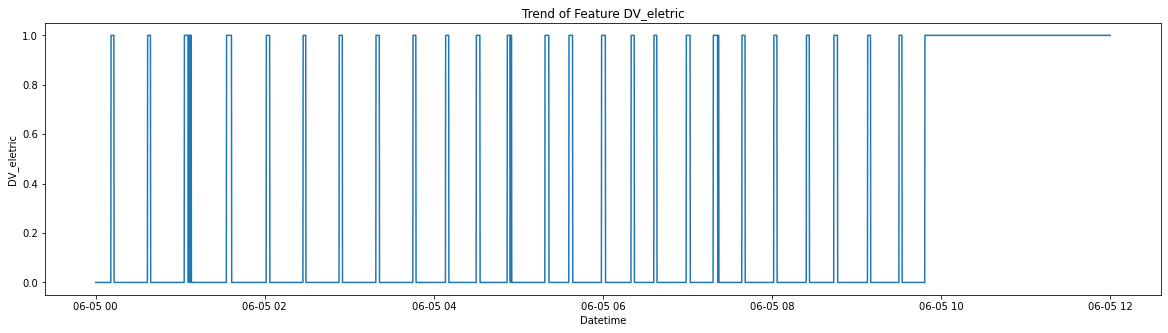

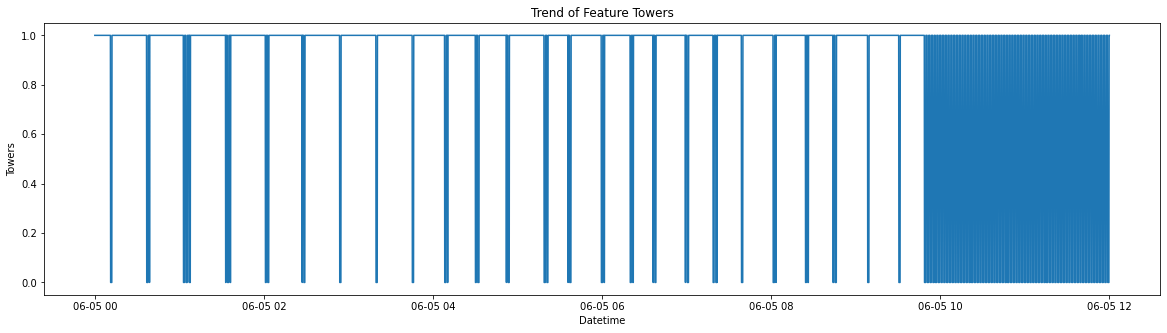

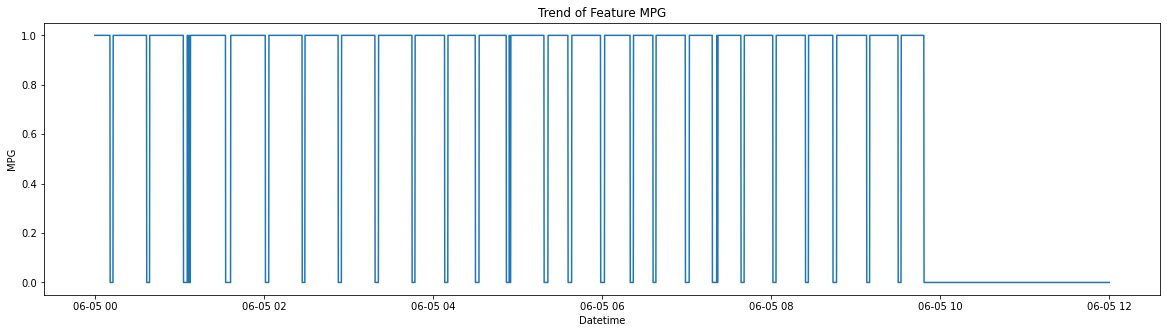

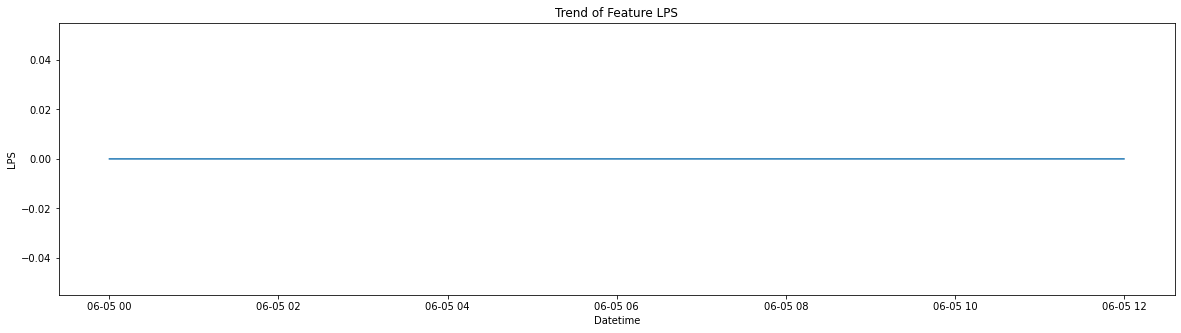

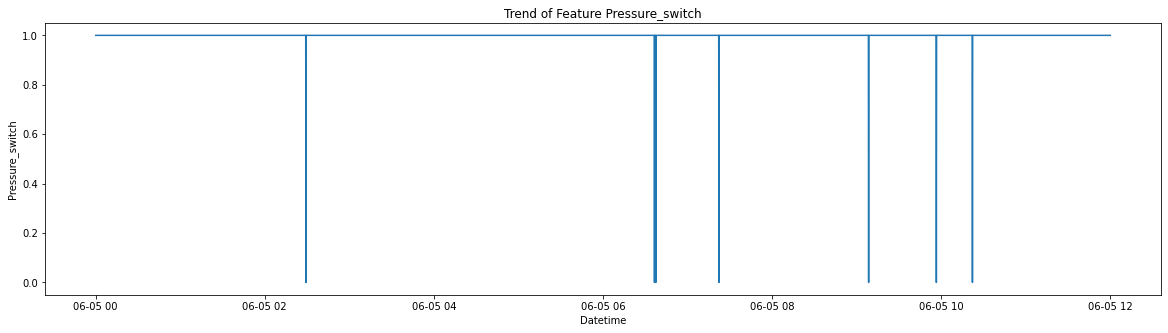

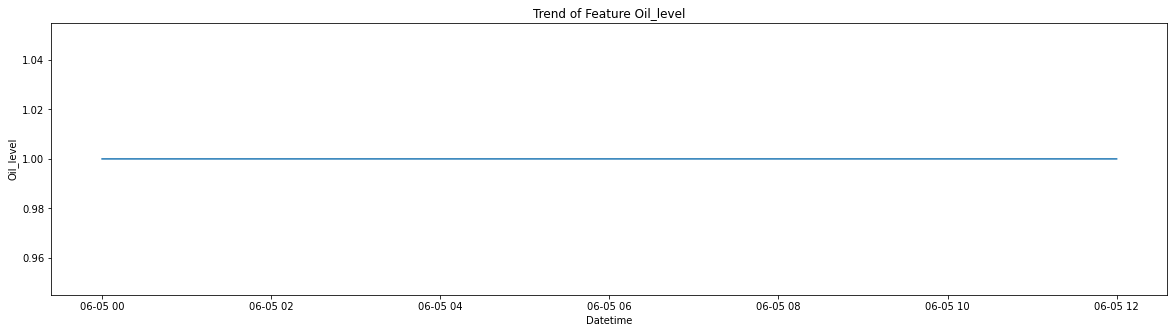

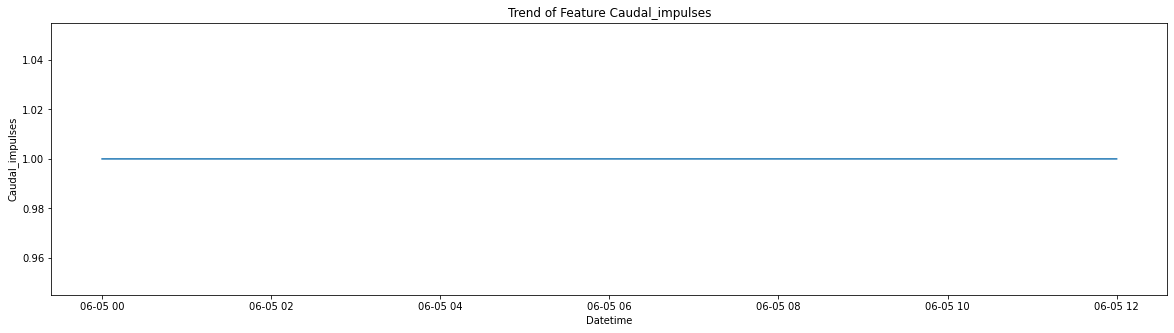

In [17]:
plot_data(data, start=datetime(2020,6,5,0,0), end=datetime(2020,6,5,12,0))

**Now 7th June 13:00 to 7th June 16:00**

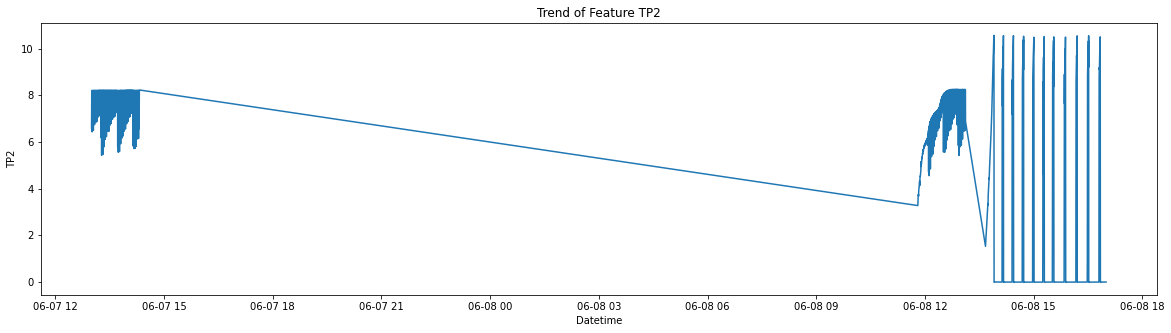

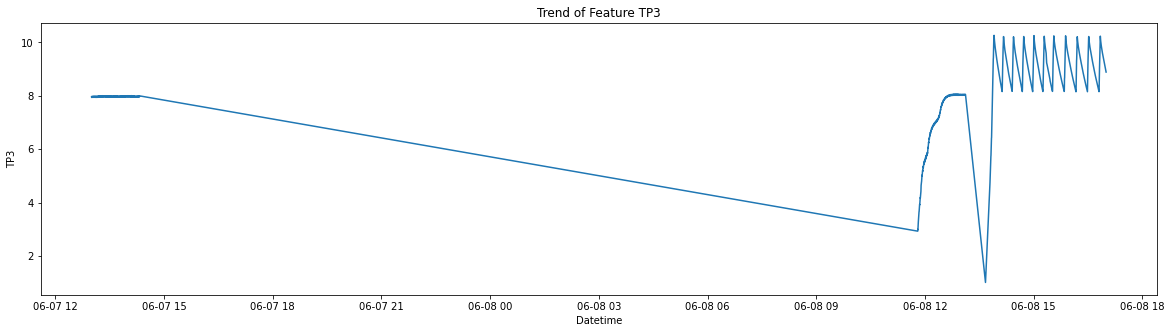

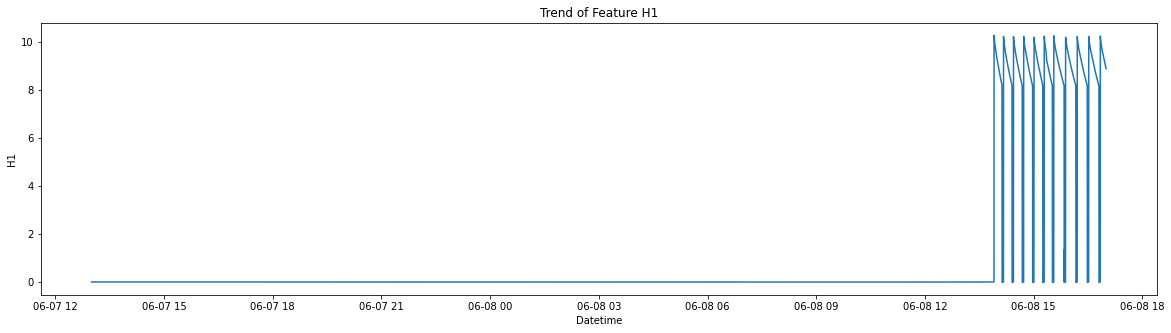

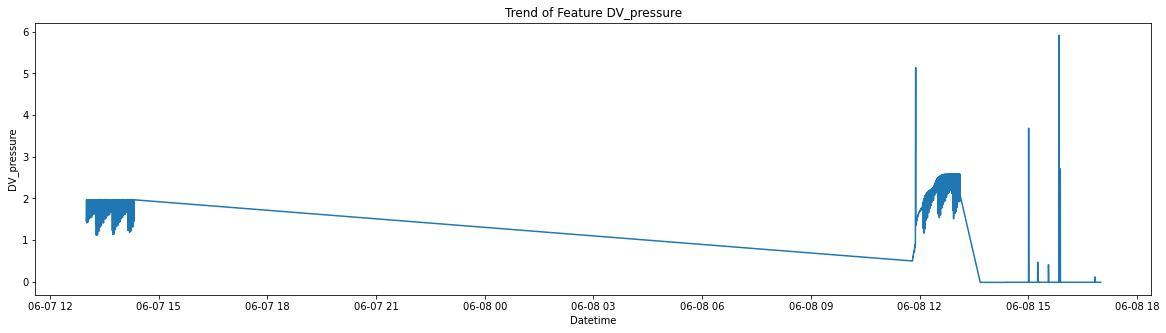

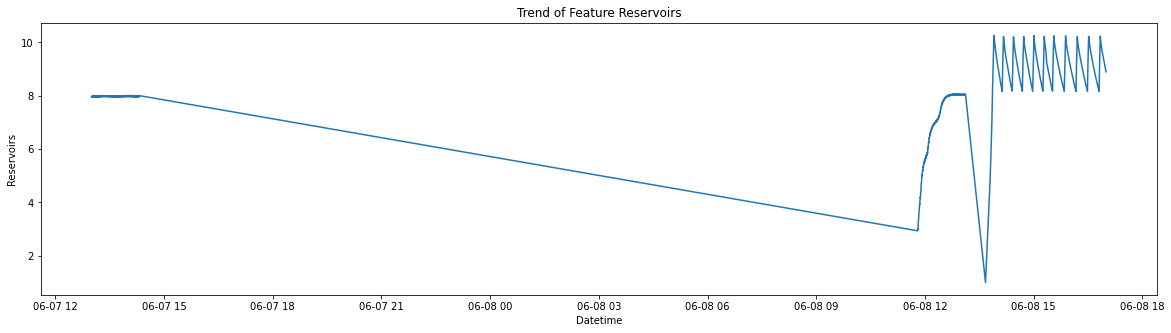

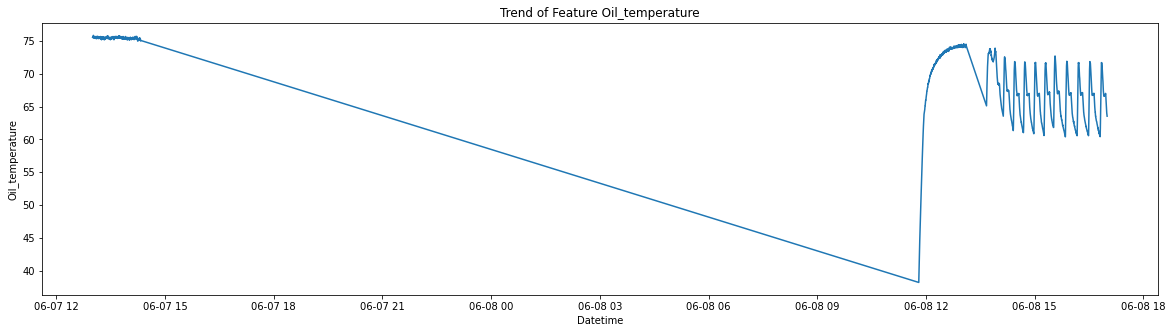

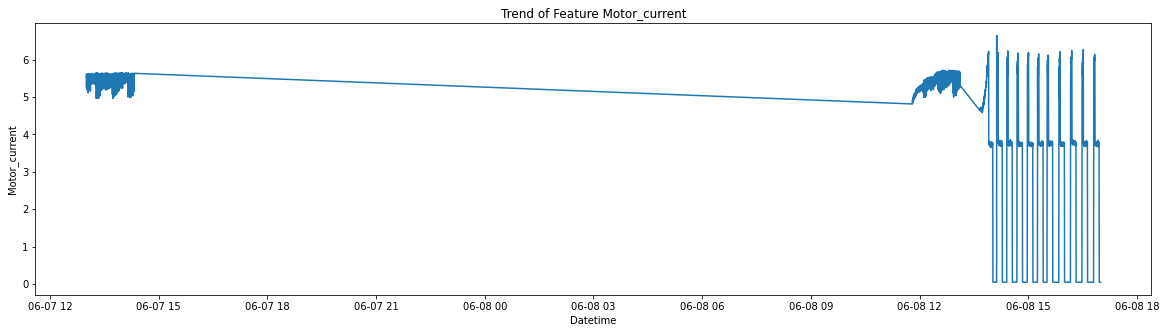

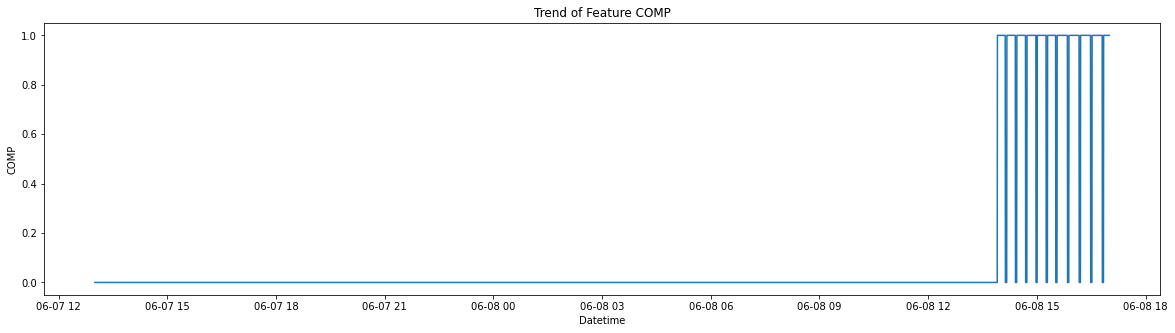

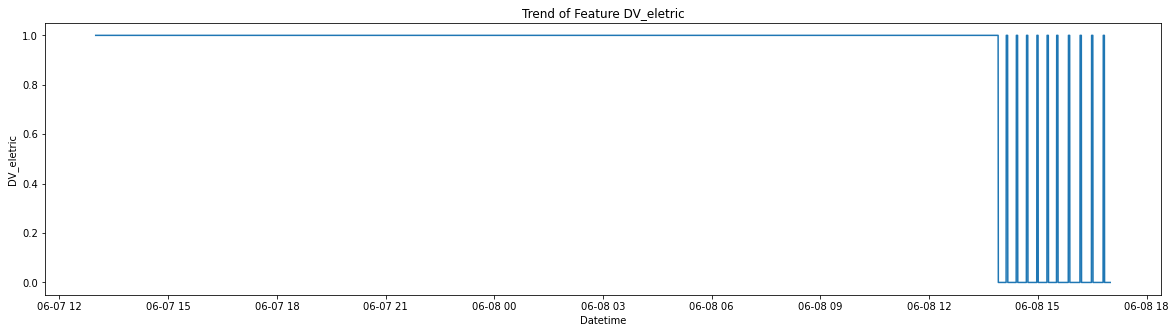

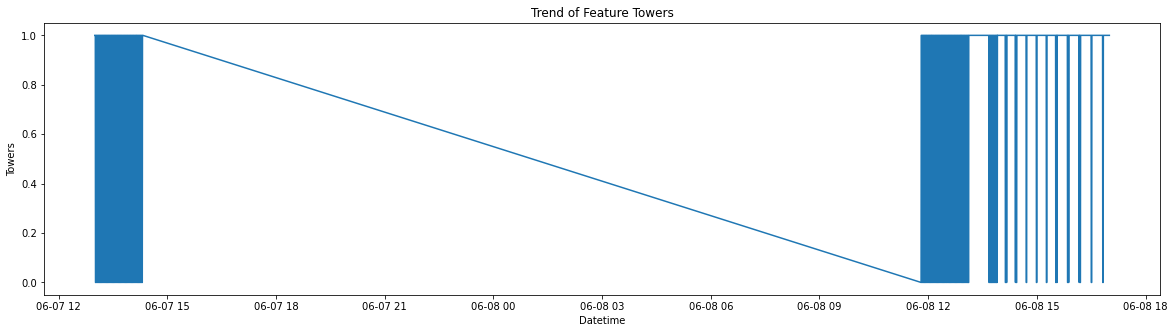

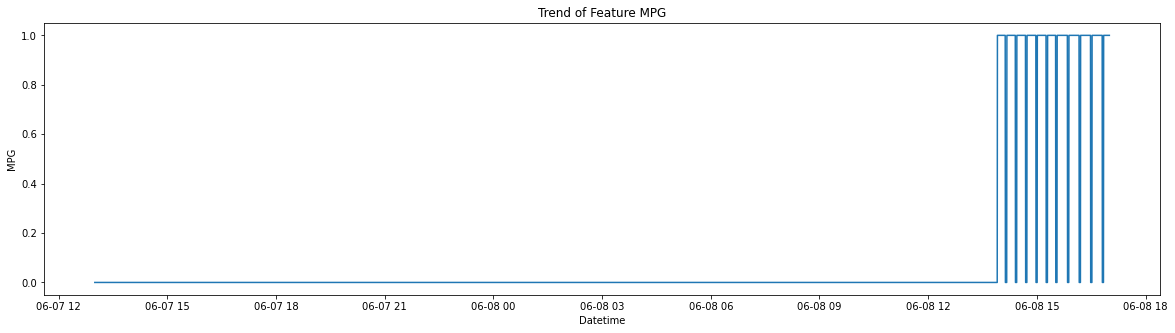

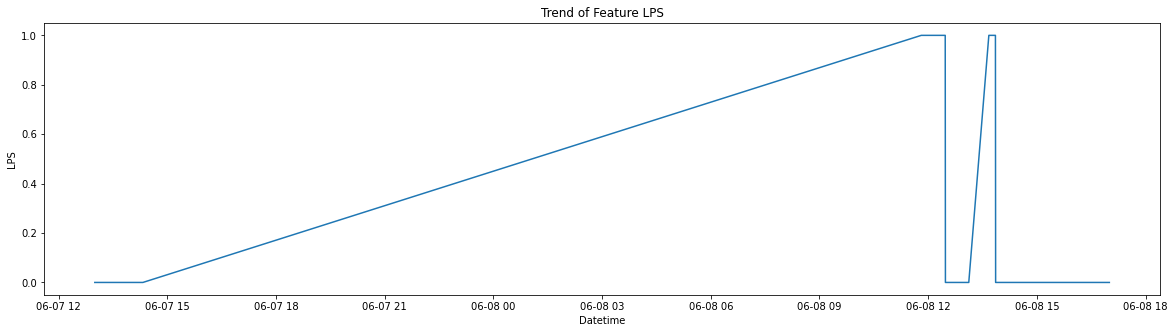

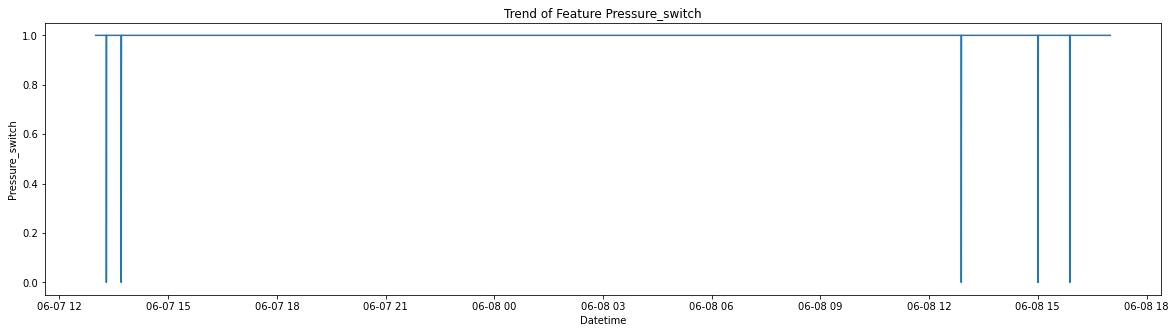

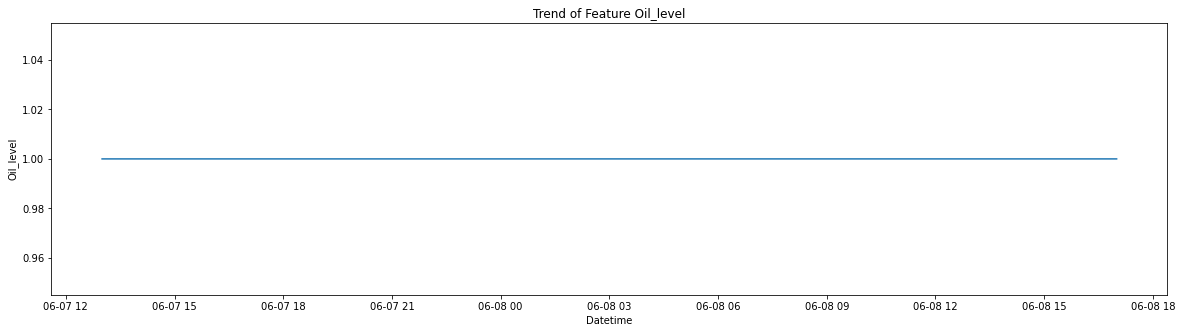

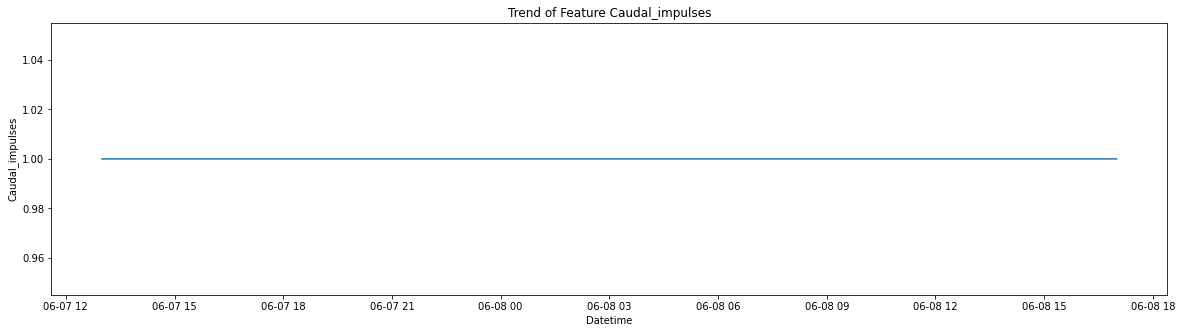

In [28]:
plot_data(data, start=datetime(2020,6,7,13,0), end=datetime(2020,6,8,17,0))

## Label The Data As Healthy and Stress - and see univariate anaylsis
**1. The data is highly imbalanced. Only 0.02% data are having fault information**

**2. For this analysis we are selecting a window 3rd June 2020 10:00 to 7th June 2020 10:00 - out of this 96 hours window last 48 hours have fault data** 

**3. LPS, Pressure Switch, Oil Level, Caudal Impulses do not have much variation during fault. So, these features will be removed. Rest of the feaures can be useful in fault detection**


In [30]:
data_labelled = data.copy()
data_labelled['status'] = 'Healthy'
data_labelled.loc[ '4/18/2020 0:00' : '4/18/2020 23:59' ,'status'] = 'Air Leak' 
data_labelled.loc[ '5/29/2020 23:30' : '5/30/2020 6:00' ,'status'] = 'Air Leak'
data_labelled.loc[ '6/5/2020 10:00' : '6/7/2020 14:30' ,'status'] = 'Air Leak' 
data_labelled.loc[ '7/15/2020 14:30' : '7/15/2020 19:00' ,'status'] = 'Air Leak' 

In [37]:
fault_count = data_labelled['status'][data_labelled['status']=='Air Leak'].count()
print(f"Out of {data.shape[0]} data only {fault_count} numbers of fault data are present.")
print(f"The ratio of fault data is {fault_count/data.shape[0]}%")

Out of 1516948 data only 29971 numbers of fault data are present.
The ratio of fault data is 0.019757434005648184%


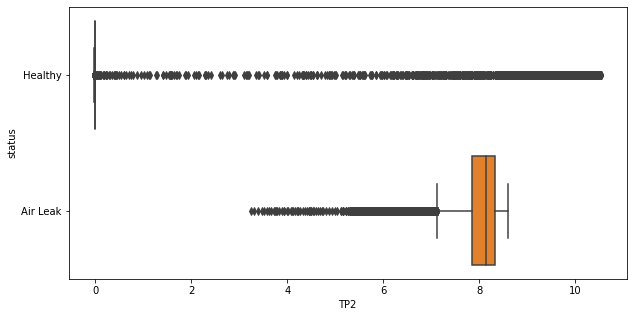

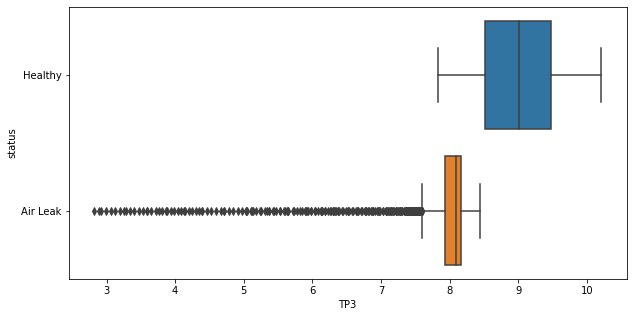

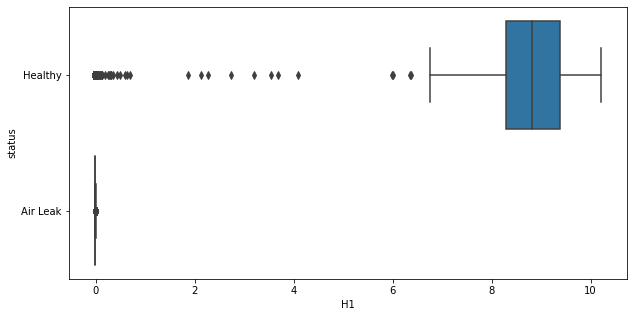

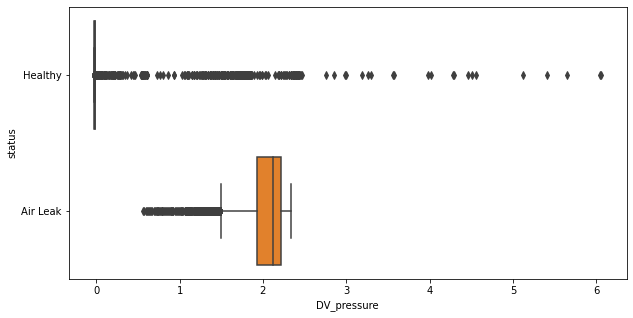

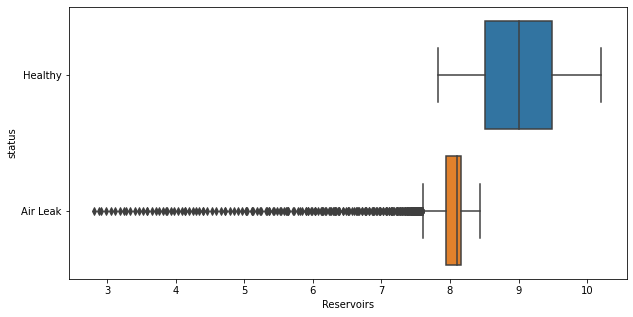

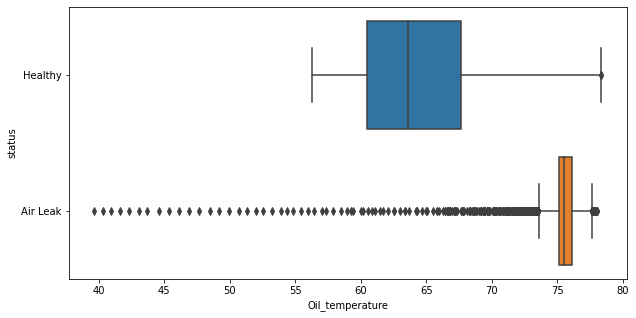

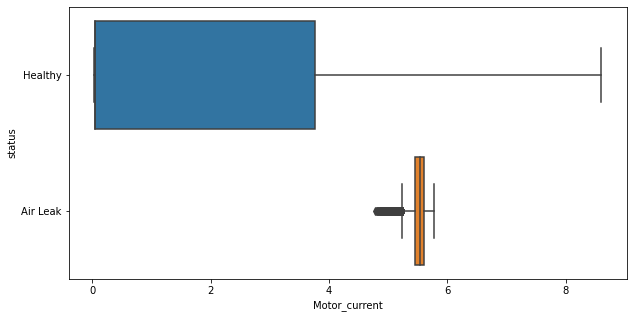

In [45]:
data_slice  = data_labelled['6/3/2020 10:00:00' : '6/7/2020 10:00:00']

for column in numerical_features:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=data_slice, x=column, y='status')

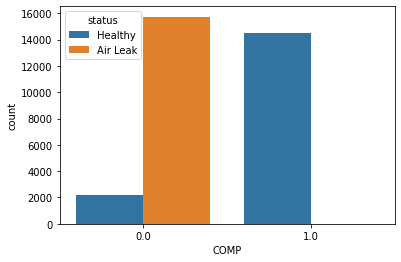

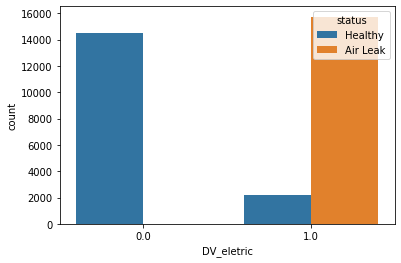

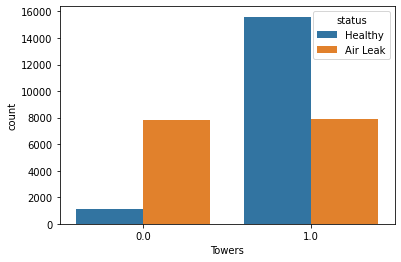

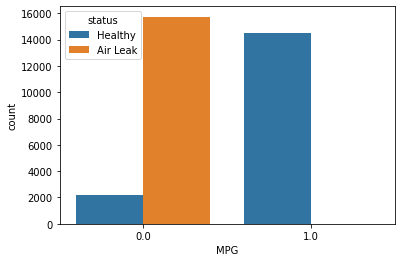

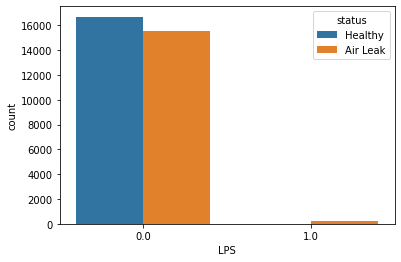

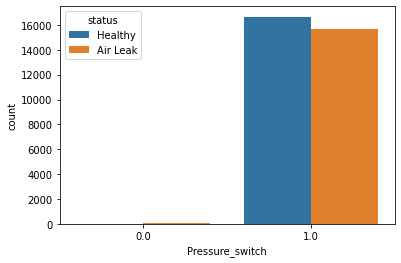

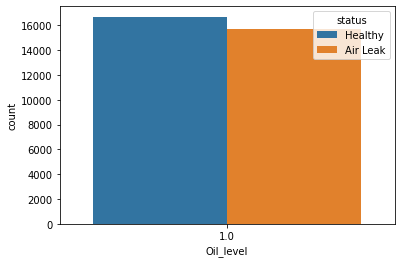

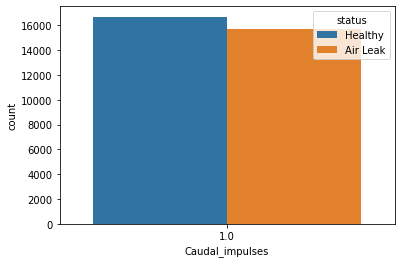

In [60]:
for column in categorical_features:
    sns.countplot(data=data_slice, x=column, hue='status')
    plt.show()